In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.5
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

# 房价预测
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
# 划分样本
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid = train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
# 归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
# 超参数搜索
# learn_rate : [1e-4,3e-4,1e-3,3e-3,1e-2,3e-2]

learning_rates = [1e-4,3e-4,1e-3,3e-3,1e-2,2e-2]
histories = []
for lr in learning_rates:

    # 搭建模型
    model = keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    # 编译
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    # 回调函数
    callbacks = [keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]

    #训练
    history = model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 150us/sample - loss: 4.5148 - val_loss: 3.9364
Epoch 2/100
11610/11610 [==============================] - 1s 83us/sample - loss: 3.1566 - val_loss: 2.8696
Epoch 3/100
11610/11610 [==============================] - 1s 81us/sample - loss: 2.3417 - val_loss: 2.2183
Epoch 4/100
11610/11610 [==============================] - 1s 77us/sample - loss: 1.8353 - val_loss: 1.8041
Epoch 5/100
11610/11610 [==============================] - 1s 75us/sample - loss: 1.5092 - val_loss: 1.5312
Epoch 6/100
11610/11610 [==============================] - 1s 74us/sample - loss: 1.2926 - val_loss: 1.3449
Epoch 7/100
11610/11610 [==============================] - 1s 77us/sample - loss: 1.1455 - val_loss: 1.2145
Epoch 8/100
11610/11610 [==============================] - 1s 77us/sample - loss: 1.0433 - val_loss: 1.1206
Epoch 9/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.97

Epoch 76/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5774 - val_loss: 0.6244
Epoch 77/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5758 - val_loss: 0.6227
Epoch 78/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5742 - val_loss: 0.6209
Epoch 79/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5726 - val_loss: 0.6191
Epoch 80/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5710 - val_loss: 0.6174
Epoch 81/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5695 - val_loss: 0.6157
Epoch 82/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5679 - val_loss: 0.6140
Epoch 83/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5664 - val_loss: 0.6124
Epoch 84/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5649 - val_loss: 0.6107
Epoch 85/100
11610/

Epoch 51/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4868 - val_loss: 0.5201
Epoch 52/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4852 - val_loss: 0.5178
Epoch 53/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4837 - val_loss: 0.5162
Epoch 54/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4823 - val_loss: 0.5146
Epoch 55/100
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4808 - val_loss: 0.5131
Epoch 56/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4795 - val_loss: 0.5117
Epoch 57/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4782 - val_loss: 0.5103
Epoch 58/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4769 - val_loss: 0.5084
Epoch 59/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4756 - val_loss: 0.5074
Epoch 60/100
11610/

11610/11610 [==============================] - 1s 77us/sample - loss: 0.4339 - val_loss: 0.4566
Epoch 26/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4319 - val_loss: 0.4541
Epoch 27/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4301 - val_loss: 0.4517
Epoch 28/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4282 - val_loss: 0.4496
Epoch 29/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.4267 - val_loss: 0.4472
Epoch 30/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4250 - val_loss: 0.4463
Epoch 31/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4236 - val_loss: 0.4431
Epoch 32/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4220 - val_loss: 0.4417
Epoch 33/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4207 - val_loss: 0.4404
Epoch 34/100
11610/11610 [======

Epoch 3/100
11610/11610 [==============================] - 1s 72us/sample - loss: 0.5695 - val_loss: 0.5927
Epoch 4/100
11610/11610 [==============================] - 1s 79us/sample - loss: 0.5286 - val_loss: 0.5529
Epoch 5/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.5011 - val_loss: 0.5413
Epoch 6/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4838 - val_loss: 0.5278
Epoch 7/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4683 - val_loss: 0.4923
Epoch 8/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4615 - val_loss: 0.4805
Epoch 9/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4516 - val_loss: 0.4690
Epoch 10/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4432 - val_loss: 0.4643
Epoch 11/100
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4367 - val_loss: 0.4552
Epoch 12/100
11610/11610 [

11610/11610 [==============================] - 1s 74us/sample - loss: 0.3524 - val_loss: 0.3665
Epoch 17/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3486 - val_loss: 0.3801
Epoch 18/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3487 - val_loss: 0.3623
Epoch 19/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.3459 - val_loss: 0.3590
Epoch 20/100
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3462 - val_loss: 0.3637
Epoch 21/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3498 - val_loss: 0.3584
Epoch 22/100
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3528 - val_loss: 0.3560
Epoch 23/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3436 - val_loss: 0.3581
Epoch 24/100
11610/11610 [==============================] - 1s 73us/sample - loss: 0.3416 - val_loss: 0.3751
Epoch 25/100
11610/11610 [======

Learning_rate:  0.0001


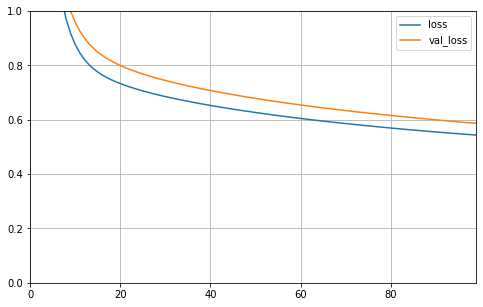

Learning_rate:  0.0003


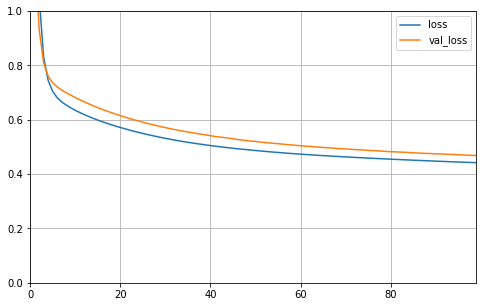

Learning_rate:  0.001


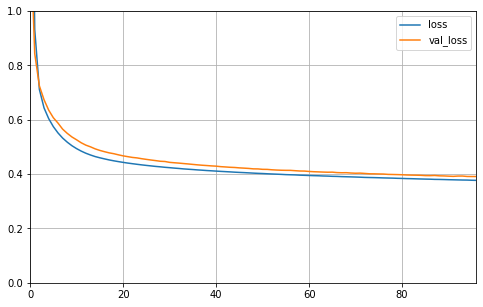

Learning_rate:  0.003


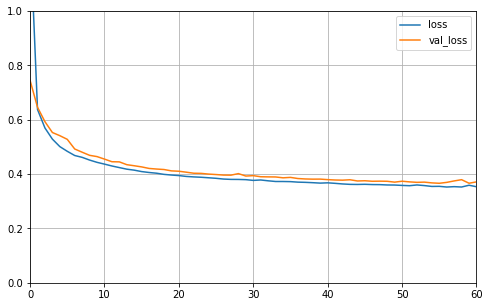

Learning_rate:  0.01


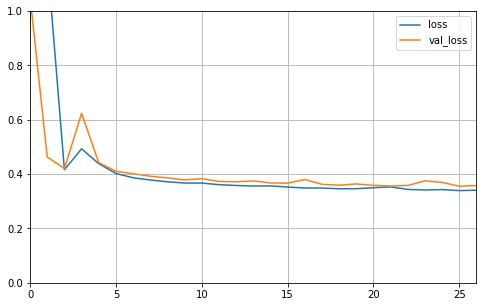

Learning_rate:  0.02


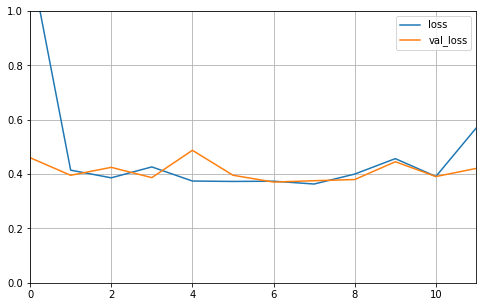

In [7]:
# 学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
for lr,history in zip(learning_rates,histories):
    print("Learning_rate: ",lr)
    plot_learning_curves(history)
